# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# to track
city_tracker = 1
# set_tracker = 1

# lists for results
max_temp = []
humidity_list = []
cloudiness_results = []
wind_speed = []
cities_list = []
country_list =[]
latitude = []
longitude = []
date = []

print(f"Begin")

# for loop for query
for city in cities:
#     if (i % 50 == 0 and i >= 50):
#         city_tracker = 1
#         set_tracker += 1
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #cities_query 
    response = requests.get(url).json()
    #append to list
    try:
        max_temp.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_results.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
         #results
        print(f"Result # {city_tracker} | {city}")
        #next
        city_tracker += 1
    except: 
        print("Unable to locate city, next result")
        pass
print("End")

Begin
Result # 1 | chuy
Result # 2 | rikitea
Result # 3 | labuhan
Result # 4 | naze
Unable to locate city, next result
Result # 5 | port alfred
Result # 6 | bredasdorp
Result # 7 | avera
Result # 8 | sangar
Result # 9 | dikson
Result # 10 | samarai
Result # 11 | grand gaube
Result # 12 | tasiilaq
Result # 13 | qaanaaq
Result # 14 | new norfolk
Result # 15 | sharlyk
Result # 16 | saskylakh
Result # 17 | boralday
Result # 18 | airai
Result # 19 | busselton
Result # 20 | abhar
Unable to locate city, next result
Result # 21 | tuktoyaktuk
Result # 22 | quatre cocos
Result # 23 | norman wells
Result # 24 | elizabeth city
Result # 25 | port blair
Result # 26 | burnie
Result # 27 | itoman
Result # 28 | mataura
Result # 29 | bluff
Result # 30 | anadyr
Unable to locate city, next result
Result # 31 | codrington
Result # 32 | rawson
Result # 33 | vao
Result # 34 | paamiut
Result # 35 | kapaa
Unable to locate city, next result
Result # 36 | hermanus
Result # 37 | vaini
Result # 38 | bethel
Result 

Result # 310 | ust-tsilma
Result # 311 | anchorage
Unable to locate city, next result
Result # 312 | lundazi
Result # 313 | sioux lookout
Result # 314 | alice springs
Result # 315 | kavaratti
Result # 316 | terrace bay
Result # 317 | kirensk
Result # 318 | mosjoen
Result # 319 | port macquarie
Result # 320 | san juan
Result # 321 | ostrovnoy
Result # 322 | saldanha
Result # 323 | korhogo
Result # 324 | coatesville
Result # 325 | dingle
Result # 326 | okhotsk
Result # 327 | asau
Result # 328 | camana
Result # 329 | novyy urgal
Result # 330 | batticaloa
Result # 331 | sokoni
Result # 332 | stokmarknes
Result # 333 | fairbanks
Result # 334 | honolulu
Result # 335 | hokitika
Result # 336 | santa ana
Result # 337 | xining
Result # 338 | dwarka
Result # 339 | vila velha
Result # 340 | malanje
Result # 341 | yulara
Result # 342 | lata
Unable to locate city, next result
Result # 343 | narovchat
Unable to locate city, next result
Result # 344 | tarko-sale
Result # 345 | ihosy
Result # 346 | mbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dictionary
Results = {
    "City": cities_list,
    "Country": country_list,
    "Latitude": latitude,
    "Longitude": longitude,
    "Date": date,
    "Cloudiness": cloudiness_results,
    "Humidity": humidity_list,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_api_df = pd.DataFrame(Results)
weather_api_df.count()

City          556
Country       556
Latitude      556
Longitude     556
Date          556
Cloudiness    556
Humidity      556
Max Temp      556
Wind Speed    556
dtype: int64

In [5]:
weather_api_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Chui,UY,-33.70,-53.46,1594625388,100,71,41.22,9.48
1,Rikitea,PF,-23.12,-134.97,1594625388,100,80,70.92,14.88
2,Labuhan,ID,-6.88,112.21,1594625388,97,65,84.85,7.34
3,Naze,JP,28.37,129.48,1594625389,75,79,87.80,10.29
4,Port Alfred,ZA,-33.59,26.89,1594625389,0,26,67.03,13.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_api_df.describe()

,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
count,556.000000,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000
mean,21.441673,19.261763,1.594625e+09,51.343525,68.230216,70.405108,7.851709
std,33.181038,90.469076,7.359981e+01,40.225880,21.758732,14.573854,5.291027
min,-54.800000,-175.200000,1.594625e+09,0.000000,1.000000,32.000000,0.380000
25%,-5.577500,-64.510000,1.594625e+09,4.000000,54.750000,60.920000,3.932500
50%,27.875000,22.845000,1.594625e+09,60.000000,74.000000,72.005000,6.710000
75%,48.502500,100.705000,1.594626e+09,91.000000,84.000000,81.000000,10.517500
max,78.220000,178.420000,1.594626e+09,100.000000,100.000000,111.200000,29.100000


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

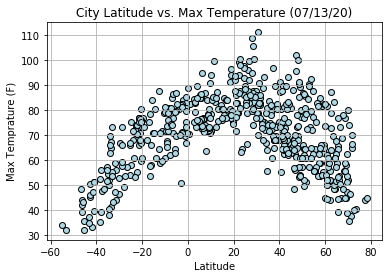

In [9]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

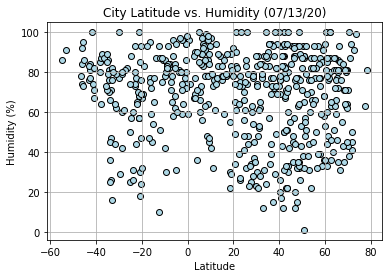

In [10]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Humidity"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

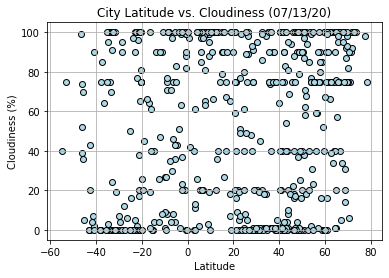

In [11]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Cloudiness"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

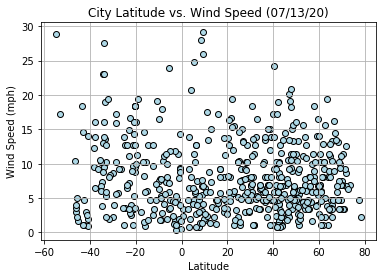

In [12]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Wind Speed"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] >= 0, :]
northern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
3,Naze,JP,28.37,129.48,1594625389,75,79,87.80,10.29
6,Avera,US,33.19,-82.53,1594625389,1,88,75.20,5.28
7,Sangar,RU,63.92,127.47,1594625390,100,51,83.17,8.08
8,Dikson,RU,73.51,80.55,1594625390,100,99,40.33,6.89
11,Tasiilaq,GL,65.61,-37.64,1594625391,95,86,39.20,2.24


In [15]:
southern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] < 0, :]
southern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Chui,UY,-33.70,-53.46,1594625388,100,71,41.22,9.48
1,Rikitea,PF,-23.12,-134.97,1594625388,100,80,70.92,14.88
2,Labuhan,ID,-6.88,112.21,1594625388,97,65,84.85,7.34
4,Port Alfred,ZA,-33.59,26.89,1594625389,0,26,67.03,13.65
5,Bredasdorp,ZA,-34.53,20.04,1594625389,100,81,50.00,23.04


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.58
The r-squared is: 0.33723923394180266


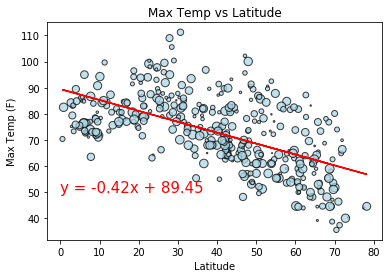

In [16]:
Latitude = northern_lat_df["Latitude"]
Max_Temp = northern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.79
The r-squared is: 0.6290610410015656


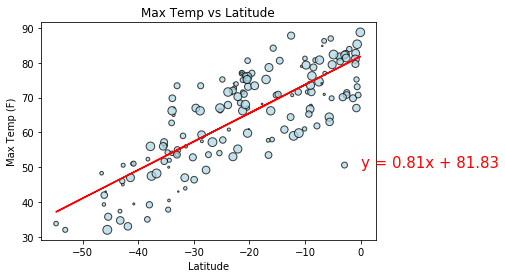

In [17]:
Latitude = southern_lat_df["Latitude"]
Max_Temp = southern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09
The r-squared is: 0.008946833906076927


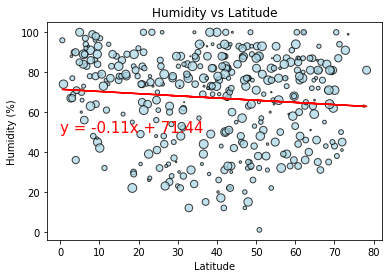

In [18]:
Latitude = northern_lat_df["Latitude"]
Humidity = northern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.01
The r-squared is: 0.00020967420090576316


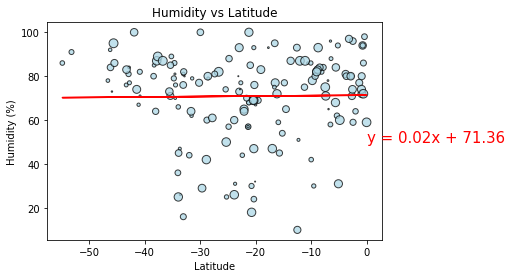

In [19]:
Latitude = southern_lat_df["Latitude"]
Humidity = southern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06
The r-squared is: 0.0033013283828301435


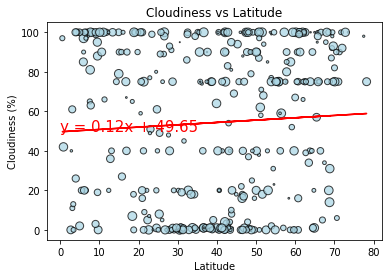

In [20]:
Latitude = northern_lat_df["Latitude"]
Cloudiness = northern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.18
The r-squared is: 0.03280928972522592


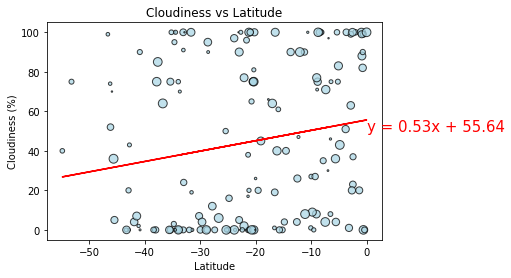

In [21]:
Latitude = southern_lat_df["Latitude"]
Cloudiness = southern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.0
The r-squared is: 1.2628724628250797e-05


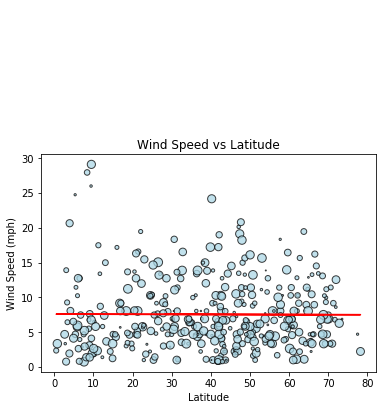

In [22]:
Latitude = northern_lat_df["Latitude"]
Wind_Speed = northern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.18
The r-squared is: 0.033794523366340534


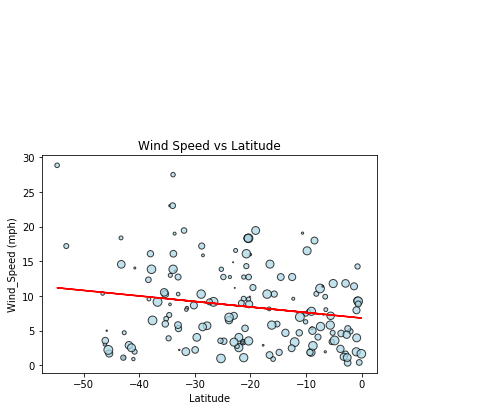

In [23]:
Latitude = southern_lat_df["Latitude"]
Wind_Speed = southern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()